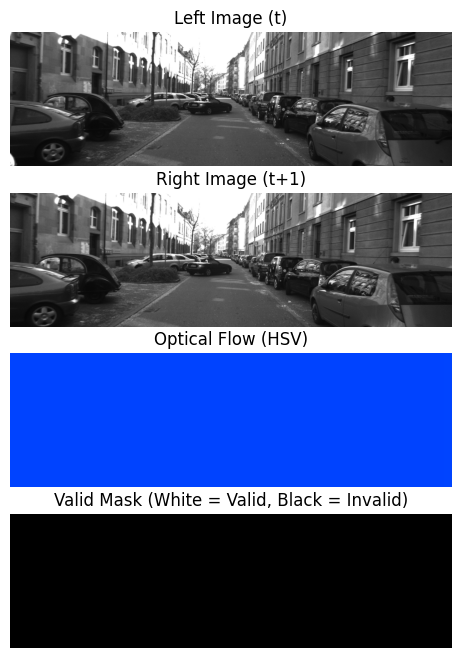

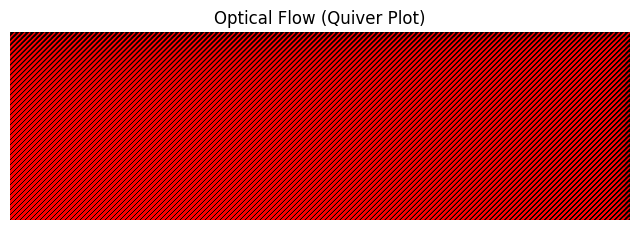

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

def load_optical_flow(flow_path):
    """Loads KITTI 2012 optical flow file and decodes u, v components."""
    flow_img = np.array(Image.open(flow_path).convert("RGB"))  # Read as uint16
    flow_u = (flow_img[:, :, 0].astype(np.float32) - 2**15) / 64.0
    flow_v = (flow_img[:, :, 1].astype(np.float32) - 2**15) / 64.0
    valid_mask = flow_img[:, :, 2] > 0  # 1 = valid flow, 0 = invalid
    return flow_u, flow_v, valid_mask

def visualize_optical_flow_hsv(flow_u, flow_v, valid_mask):
    """Visualizes optical flow using an HSV color encoding."""
    h, w = flow_u.shape
    magnitude, angle = cv2.cartToPolar(flow_u, flow_v)

    # Create an HSV image (hue = direction, value = magnitude)
    hsv = np.zeros((h, w, 3), dtype=np.uint8)
    hsv[..., 0] = (angle * 180 / np.pi / 2).astype(np.uint8)  # Hue (direction)
    hsv[..., 1] = 255  # Saturation
    hsv[..., 2] = np.clip(magnitude * 5, 0, 255).astype(np.uint8)  # Value (intensity)

    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)  # Convert to RGB for visualization

def visualize_optical_flow_quiver(flow_u, flow_v, valid_mask, step=10):
    """Visualizes optical flow using a quiver plot (arrows)."""
    h, w = flow_u.shape
    y, x = np.mgrid[0:h:step, 0:w:step]

    plt.figure(figsize=(8, 6))
    plt.imshow(np.zeros((h, w, 3), dtype=np.uint8))  # Black background
    plt.quiver(x, y, flow_u[::step, ::step], -flow_v[::step, ::step], angles="xy", scale_units="xy", scale=1, color="r")
    plt.title("Optical Flow (Quiver Plot)")
    plt.axis("off")
    plt.show()

# Paths to images and flow file (update as needed)
image_left_path = "image_0/000045_10.png"
image_right_path = "image_0/000045_11.png"
flow_path = "flow_oclusion/000045_10.png"

# Load images and flow
image_left = np.array(Image.open(image_left_path).convert("RGB"))
image_right = np.array(Image.open(image_right_path).convert("RGB"))
flow_u, flow_v, valid_mask = load_optical_flow(flow_path)

# Visualize Flow in HSV
flow_hsv = visualize_optical_flow_hsv(flow_u, flow_v, valid_mask)

# Plot side-by-side comparison
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
axes[0].imshow(image_left)
axes[0].set_title("Left Image (t)")
axes[1].imshow(image_right)
axes[1].set_title("Right Image (t+1)")
axes[2].imshow(flow_hsv)
axes[2].set_title("Optical Flow (HSV)")
axes[3].imshow(valid_mask, cmap="gray")
axes[3].set_title("Valid Mask (White = Valid, Black = Invalid)")

for ax in axes:
    ax.axis("off")

plt.show()

# Show quiver plot separately
visualize_optical_flow_quiver(flow_u, flow_v, valid_mask)


In [20]:
print("Flow U statistics:", np.min(flow_u), np.max(flow_u))
print("Flow V statistics:", np.min(flow_v), np.max(flow_v))


Flow U statistics: -510.1875 -509.79688
Flow V statistics: -510.01562 -509.9375


GIF saved as frame_transition.gif


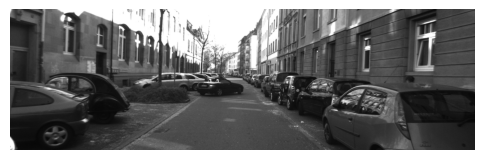

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imageio
from PIL import Image
from matplotlib.animation import FuncAnimation

# Load images
image_left_path = "image_0/000045_10.png"
image_right_path = "image_0/000045_11.png"

image_left = np.array(Image.open(image_left_path).convert("RGB"))
image_right = np.array(Image.open(image_right_path).convert("RGB"))

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))
frame_display = ax.imshow(image_left)
ax.axis("off")

# Frames sequence: forward and backward loop
frames = [image_left, image_right] + [image_right, image_left]  # Forward & backward transition

def update(frame_index):
    """Update the displayed image."""
    frame_display.set_data(frames[frame_index])

# Create animation
anim = FuncAnimation(fig, update, frames=len(frames), interval=500, repeat=True)

# Save as GIF
gif_path = "frame_transition.gif"
anim.save(gif_path, writer="pillow", fps=2)

print(f"GIF saved as {gif_path}")
plt.show()
